# Authentication

In [1]:
#This step is used to import praw
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/Similar_Annual7584"
reddit = praw.Reddit(
    client_id="YXF5BKUD0AKVEOgtVk5z1A",
    
    client_secret="2JyljUUhgT6ztr_O1vQh8XHQ28jqMg",
    
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Get Trending Topic from your Subreddit

In [3]:
#This step is used to get a trending topic from our reddit
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
103
0.96
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


# Getting total comment in Subreddit

In [4]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

612


In [5]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Seriously why gold people don’t buy Bitcoin as...
1,"Daily Discussion, April 20, 2024"
2,"just for information, why bitcoin would care a..."
3,How to use bitcoin for daily purchases?
4,1.2 BTC = Lambo (from 2004)


In [6]:
# df = df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Seriously why gold people don’t buy Bitcoin as...
1,"Daily Discussion, April 20, 2024"
2,"just for information, why bitcoin would care a..."
3,How to use bitcoin for daily purchases?
4,1.2 BTC = Lambo (from 2004)


In [7]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
bitcoin_df.columns = ['Titles']

In [9]:
bitcoin_df.head()

,Titles
0,Seriously why gold people don’t buy Bitcoin as...
1,"Daily Discussion, April 20, 2024"
2,"just for information, why bitcoin would care a..."
3,How to use bitcoin for daily purchases?
4,1.2 BTC = Lambo (from 2004)


In [10]:
bitcoin_df.Titles.duplicated().sum() 

0

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Seriously why gold people don’t buy Bitcoin as...
1,"Daily Discussion, April 20, 2024"
2,"just for information, why bitcoin would care a..."
3,How to use bitcoin for daily purchases?
4,1.2 BTC = Lambo (from 2004)


In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Seriously why gold people don’t buy Bitcoin as...
1,"Daily Discussion, April 20, 2024"
2,"just for information, why bitcoin would care a..."
3,How to use bitcoin for daily purchases?
4,1.2 BTC = Lambo (from 2004)


In [13]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [14]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Seriously why gold people don’t buy Bitcoin as...,0.433333,-0.066667
1,"Daily Discussion, April 20, 2024",0.000000,0.000000
2,"just for information, why bitcoin would care a...",0.000000,0.000000
3,How to use bitcoin for daily purchases?,0.000000,0.000000
4,1.2 BTC = Lambo (from 2004),0.000000,0.000000


In [15]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Seriously why gold people don’t buy Bitcoin as...,0.433333,-0.066667,Negative
1,"Daily Discussion, April 20, 2024",0.000000,0.000000,Neutral
2,"just for information, why bitcoin would care a...",0.000000,0.000000,Neutral
3,How to use bitcoin for daily purchases?,0.000000,0.000000,Neutral
4,1.2 BTC = Lambo (from 2004),0.000000,0.000000,Neutral
5,"Daily Discussion, April 21, 2024",0.000000,0.000000,Neutral
6,Almost there,0.000000,0.000000,Neutral
7,Exploring the blockchain technology,0.000000,0.000000,Neutral
8,knowledge is power,0.000000,0.000000,Neutral
9,Less than 1 hour until halving... its finally ...,0.533333,-0.083333,Negative


# Data Visualization

In [16]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

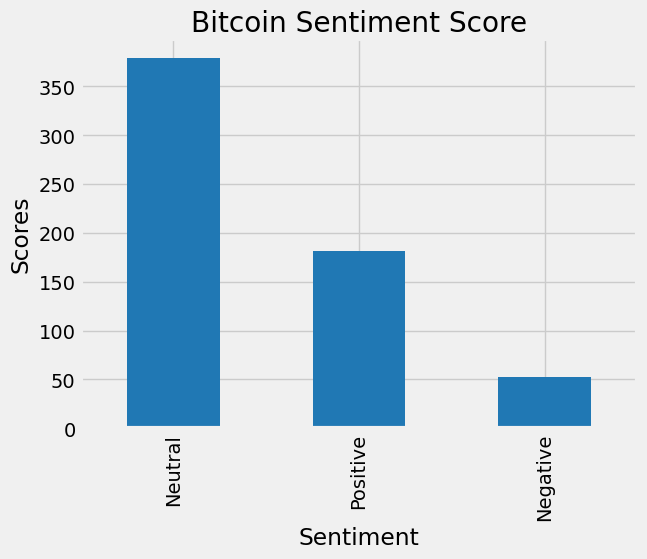

In [17]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# plotting the Word cloud

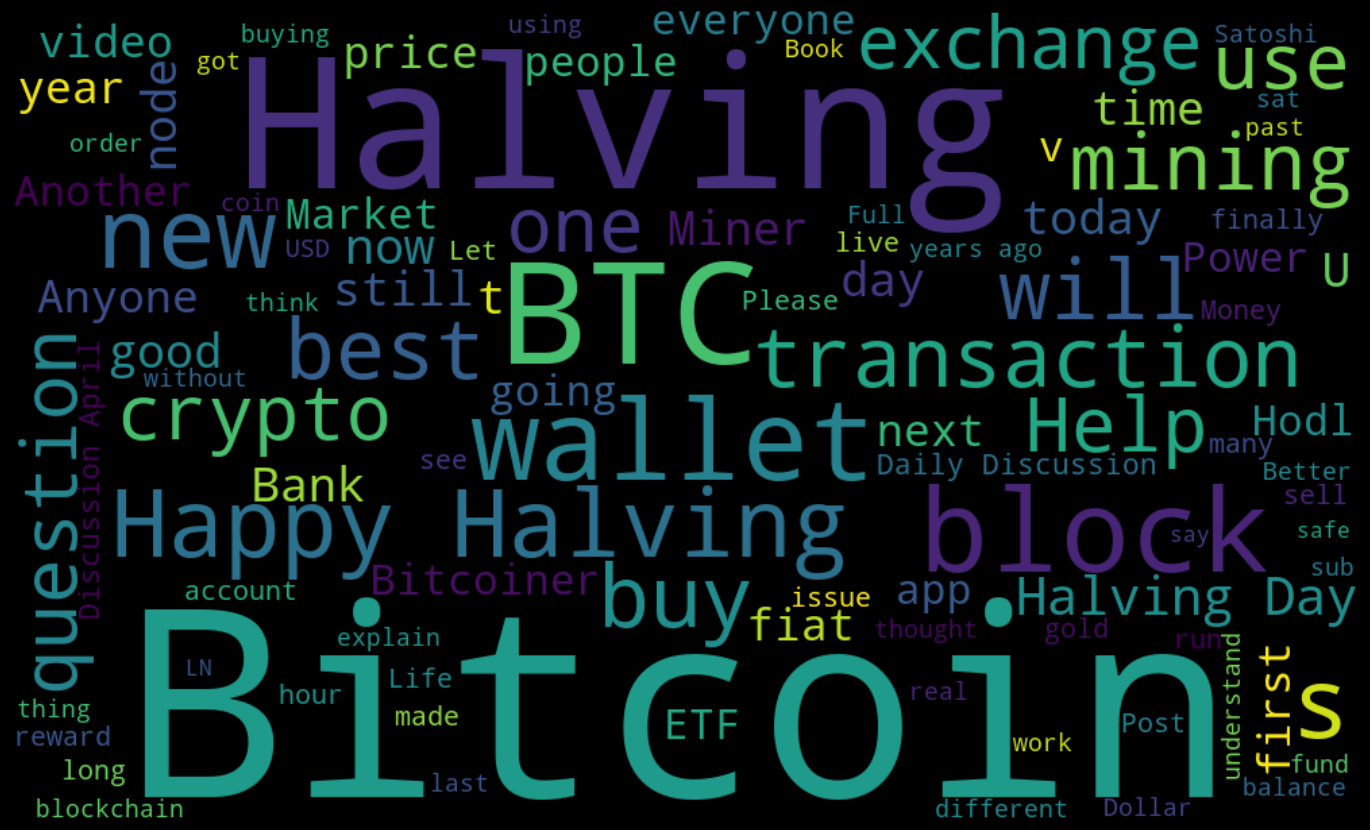

In [18]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");